# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('/content/SINASC_RO_2019 V2.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc = sinasc_raw[["munResNome", "IDADEMAE", "IDADEPAI"]]
sinasc.head()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


In [5]:
sinasc.shape

(27028, 3)

In [6]:
sinasc.isna().sum()

munResNome        0
IDADEMAE          0
IDADEPAI      19421
dtype: int64

In [7]:
sinasc = sinasc.dropna()
sinasc.shape

(7607, 3)

In [8]:
sinasc = sinasc.drop_duplicates()
sinasc.shape

(4735, 3)

In [9]:
sinasc.head()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [10]:
sinasc["DIF"] = sinasc["IDADEPAI"] - sinasc["IDADEMAE"]
sinasc.head()

,munResNome,IDADEMAE,IDADEPAI,DIF
0,Alta Floresta D'Oeste,19,26.0,7.0
1,Alta Floresta D'Oeste,29,24.0,-5.0
2,Alta Floresta D'Oeste,37,32.0,-5.0
3,Alto Alegre dos Parecis,30,24.0,-6.0
4,Alta Floresta D'Oeste,30,27.0,-3.0


In [11]:
# Criando um dataframe a partir do groupby com base na coluna
# munResNome, que faz o papel do índice. A coluna se refere à
# idade média dos pais - utilizei o método round( )
# para arrendondar por 2.

agrupamento1 = sinasc.groupby("munResNome").mean().round(2)
agrupamento1.head()

,IDADEMAE,IDADEPAI,DIF
munResNome,,,
Alta Floresta D'Oeste,26.35,30.39,4.04
Alto Alegre dos Parecis,24.79,29.62,4.83
Alto Paraíso,22.83,28.83,6.00
Alvorada D'Oeste,26.81,30.66,3.85
Ariquemes,28.13,32.47,4.33


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [12]:
sinasc2 = sinasc_raw[["DTNASC", "ESCMAE", "SEXO", "PESO"]]
sinasc2.head()

,DTNASC,ESCMAE,SEXO,PESO
0,2019-02-19,8 a 11 anos,Masculino,3685
1,2019-02-21,8 a 11 anos,Feminino,3055
2,2019-02-25,8 a 11 anos,Feminino,3460
3,2019-03-20,12 anos ou mais,Feminino,2982
4,2019-03-23,8 a 11 anos,Feminino,3310


In [13]:
sinasc2.shape

(27028, 4)

In [14]:
sinasc2.isna().sum()

DTNASC      0
ESCMAE    312
SEXO        4
PESO        0
dtype: int64

In [15]:
sinasc2 = sinasc2.dropna()
sinasc2.isna().sum()

DTNASC    0
ESCMAE    0
SEXO      0
PESO      0
dtype: int64

In [16]:
sinasc2 = sinasc2.drop_duplicates()
sinasc2.shape

(26067, 4)

In [17]:
sinasc2.head()

,DTNASC,ESCMAE,SEXO,PESO
0,2019-02-19,8 a 11 anos,Masculino,3685
1,2019-02-21,8 a 11 anos,Feminino,3055
2,2019-02-25,8 a 11 anos,Feminino,3460
3,2019-03-20,12 anos ou mais,Feminino,2982
4,2019-03-23,8 a 11 anos,Feminino,3310


In [18]:
agrupamento2 = sinasc2.groupby(["ESCMAE", "SEXO", "DTNASC"])["PESO"].mean().unstack().round(2)
agrupamento2

DTNASC                     2019-01-01  2019-01-02  2019-01-03  2019-01-04  \
ESCMAE          SEXO                                                        
1 a 3 anos      Feminino          NaN         NaN         NaN         NaN   
                Masculino     2835.00     2970.00         NaN     3055.00   
12 anos ou mais Feminino      3370.00     2841.29     3227.14     3112.89   
                Masculino     2857.50     3169.36     3332.07     3940.71   
4 a 7 anos      Feminino      3536.25     3175.00     3277.50     2681.67   
                Masculino     3373.75     3550.29     2703.33     3243.33   
8 a 11 anos     Feminino      3193.93     3339.14     3223.88     3123.56   
                Masculino     3074.76     3468.44     3219.81     3198.32   
Nenhuma         Feminino          NaN         NaN         NaN         NaN   
                Masculino         NaN         NaN         NaN     3260.00   

DTNASC                     2019-01-05  2019-01-06  2019-01-07  2019-01-08  \
ESCMAE          SEXO                                                        
1 a 3 anos      Feminino          NaN         NaN     3340.00     2800.00   
                Masculino     3615.00         NaN         NaN         NaN   
12 anos ou mais Feminino      3184.00     3370.00     2797.86     3421.11   
                Masculino     2886.43     3343.75     3142.50     3259.00   
4 a 7 anos      Feminino      3054.29     3066.00     3527.50     2784.29   
                Masculino     3349.29     3453.38     3556.43     3380.00   
8 a 11 anos     Feminino      3408.39     2907.29     3164.09     3190.66   
                Masculino     3238.04     3354.35     3438.41     3332.88   
Nenhuma         Feminino          NaN         NaN         NaN         NaN   
                Masculino         NaN         NaN         NaN         NaN   

DTNASC                     2019-01-09  2019-01-10  ...  2019-12-22  \
ESCMAE          SEXO                               ...               
1 a 3 anos      Feminino      2400.00     3651.00  ...         NaN   
                Masculino         NaN     3078.33  ...         NaN   
12 anos ou mais Feminino      3693.33     3351.11  ...     3100.00   
                Masculino     3295.91     3015.43  ...     3040.89   
4 a 7 anos      Feminino      3177.22     3152.38  ...     3603.33   
                Masculino     3434.17     3105.00  ...     3690.00   
8 a 11 anos     Feminino      3053.08     3120.91  ...     3319.64   
                Masculino     3387.80     3497.55  ...     3460.15   
Nenhuma         Feminino          NaN         NaN  ...         NaN   
                Masculino         NaN         NaN  ...         NaN   

DTNASC                     2019-12-23  2019-12-24  2019-12-25  2019-12-26  \
ESCMAE          SEXO                                                        
1 a 3 anos      Feminino          NaN     3010.00         NaN     3415.00   
                Masculino         NaN         NaN         NaN         NaN   
12 anos ou mais Feminino      3204.55     3143.75     3215.00     3559.25   
                Masculino     3413.82     3278.33     3181.67     2955.89   
4 a 7 anos      Feminino      2969.55     2996.43     3253.00     3110.88   
                Masculino     3121.45     3194.00     3582.50     3330.71   
8 a 11 anos     Feminino      3253.86     3380.05     3113.08     3139.33   
                Masculino     3337.71     2916.18     3658.44     3101.64   
Nenhuma         Feminino          NaN         NaN         NaN         NaN   
                Masculino         NaN         NaN         NaN         NaN   

DTNASC                     2019-12-27  2019-12-28  2019-12-29  2019-12-30  \
ESCMAE          SEXO                                                        
1 a 3 anos      Feminino          NaN     3300.00     3875.00     3425.00   
                Masculino     1790.00     2905.00     1942.50     3567.67   
12 anos ou mais Feminino      3267.50     3283.33     2590.00     3128.00   

**Dúvida:**

Pode me explicar mesmo eu tendo passado a função dropna() para exlcuir os dados nulos, alguns dados se manteram nulos? Eu pesquisei no GPT e, por aquilo que "ele me falou", pensei que podem se tratar de caracteres especiais que não podem ser removidos.  

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [19]:
# Criando o dataframe que servirá como base
# para a análise de qual município nasceu menos bebês
# em 2K19.

sinasc3 = sinasc_raw[["DTNASC", "munResNome", "IDADEMAE", "IDADEPAI"]]
sinasc3.head()

,DTNASC,munResNome,IDADEMAE,IDADEPAI
0,2019-02-19,Alta Floresta D'Oeste,19,26.0
1,2019-02-21,Alta Floresta D'Oeste,29,24.0
2,2019-02-25,Alta Floresta D'Oeste,37,32.0
3,2019-03-20,Alto Alegre dos Parecis,30,24.0
4,2019-03-23,Alta Floresta D'Oeste,30,27.0


In [20]:
sinasc3.isna().sum()

DTNASC            0
munResNome        0
IDADEMAE          0
IDADEPAI      19421
dtype: int64

In [21]:
sinasc3 = sinasc3.dropna()

sinasc3.isna().sum()

DTNASC        0
munResNome    0
IDADEMAE      0
IDADEPAI      0
dtype: int64

In [22]:
sinasc3 = sinasc3.drop_duplicates()
sinasc3

,DTNASC,munResNome,IDADEMAE,IDADEPAI
0,2019-02-19,Alta Floresta D'Oeste,19,26.0
1,2019-02-21,Alta Floresta D'Oeste,29,24.0
2,2019-02-25,Alta Floresta D'Oeste,37,32.0
3,2019-03-20,Alto Alegre dos Parecis,30,24.0
4,2019-03-23,Alta Floresta D'Oeste,30,27.0
...,...,...,...,...
27021,2019-11-20,Colorado do Oeste,25,38.0
27022,2019-11-21,Vilhena,34,33.0
27023,2019-12-13,Vilhena,32,35.0
27025,2019-08-02,Vilhena,24,30.0


In [23]:
agrupamento5 = sinasc3.groupby(["munResNome", "IDADEMAE", "IDADEPAI"])["DTNASC"].count()
agrupamento5.to_frame()

DTNASC
munResNome            IDADEMAE IDADEPAI        
Alta Floresta D'Oeste 14       21.0           1
                               27.0           1
                               32.0           1
                               35.0           1
                      15       17.0           1
...                                         ...
Vilhena               40       32.0           1
                               37.0           1
                      41       41.0           1
                               42.0           1
                      44       38.0           1

[4735 rows x 1 columns]

In [35]:
agrupamento3 = sinasc.groupby("munResNome").agg(["min", np.mean, max]).round(2)
agrupamento3.head()

IDADEMAE            IDADEPAI                DIF        \
                             min   mean max      min   mean   max   min  mean   
munResNome                                                                      
Alta Floresta D'Oeste         14  26.35  53     17.0  30.39  58.0 -21.0  4.04   
Alto Alegre dos Parecis       14  24.79  41     16.0  29.62  50.0  -9.0  4.83   
Alto Paraíso                  16  22.83  32     21.0  28.83  49.0  -3.0  6.00   
Alvorada D'Oeste              15  26.81  40     17.0  30.66  52.0 -11.0  3.85   
Ariquemes                     15  28.13  39     20.0  32.47  51.0 -12.0  4.33   

                               
                          max  
munResNome                     
Alta Floresta D'Oeste    34.0  
Alto Alegre dos Parecis  21.0  
Alto Paraíso             24.0  
Alvorada D'Oeste         26.0  
Ariquemes                20.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [25]:
sinasc3 = sinasc_raw[["DTNASC", "munResNome"]]
sinasc3

,DTNASC,munResNome
0,2019-02-19,Alta Floresta D'Oeste
1,2019-02-21,Alta Floresta D'Oeste
2,2019-02-25,Alta Floresta D'Oeste
3,2019-03-20,Alto Alegre dos Parecis
4,2019-03-23,Alta Floresta D'Oeste
...,...,...
27023,2019-12-13,Vilhena
27024,2019-10-04,Chupinguaia
27025,2019-08-02,Vilhena
27026,2019-12-23,Vilhena


In [26]:
sinasc3 = sinasc3.drop_duplicates()
sinasc3.shape

(8711, 2)

In [27]:
# Para eu selecionar apenas os dados de março, preciso
# transformar a variável DTNASC a partir da função datetime():

sinasc3["DTNASC"] = pd.to_datetime(sinasc3["DTNASC"])

sinasc3.dtypes

<ipython-input-27-9af9393f1bd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc3["DTNASC"] = pd.to_datetime(sinasc3["DTNASC"])


DTNASC        datetime64[ns]
munResNome            object
dtype: object

In [28]:
# Selecionando apenas as linhas com datas de março

sinasc_marco = sinasc3[(sinasc3['DTNASC'].dt.month == 3)]
sinasc_marco.head()

,DTNASC,munResNome
3,2019-03-20,Alto Alegre dos Parecis
4,2019-03-23,Alta Floresta D'Oeste
5,2019-03-27,Alta Floresta D'Oeste
9,2019-03-11,Alta Floresta D'Oeste
11,2019-03-12,Alta Floresta D'Oeste


In [29]:
agrupamento4 = sinasc_marco.groupby("munResNome").count()
agrupamento4


,DTNASC
munResNome,
Alta Floresta D'Oeste,19
Alto Alegre dos Parecis,10
Alto Paraíso,16
Alvorada D'Oeste,17
Ariquemes,30
Buritis,26
Cabixi,4
Cacaulândia,8
Cacoal,30


In [30]:
# Com a presença de muitos munícipios que dificultaria a plotagem
# de um gráfico, resolvi enxurgar a quantidade de munípios, selecionando
# apenas aqueles que possuíam mais de 26 nascimentos no mês de março.

agrupamento4 = agrupamento4.loc[agrupamento4['DTNASC'] > 26]
agrupamento4

,DTNASC
munResNome,
Ariquemes,30
Cacoal,30
Guajará-Mirim,29
Jaru,28
Ji-Paraná,31
Pimenta Bueno,27
Porto Velho,31
Vilhena,31


**Resposta:**

Segundo o dataframe, nota-se que não há um único município que obteve a maior taxa de natalidade no período selecionado, sendo três, porém: Vilhena, Porto Velho e Ji-Paraná.

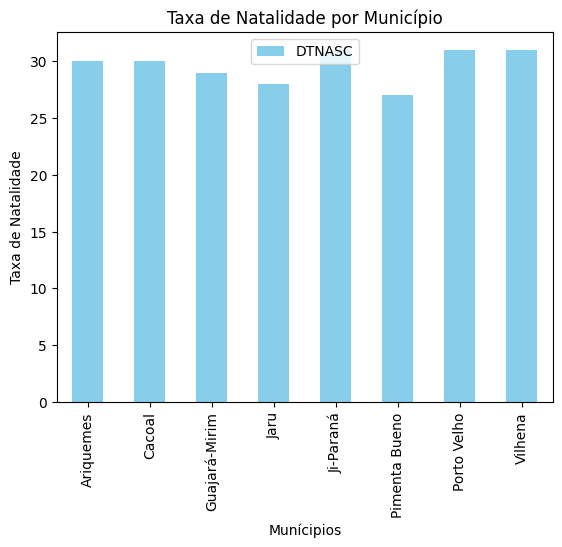

In [31]:
import matplotlib.pyplot as plt

cores = ["skyblue", "black", "lightgreen", "orange", "yellow", "purple", "pink", "red"]

agrupamento4.plot.bar(color=cores)
plt.xlabel("Munícipios")
plt.ylabel("Taxa de Natalidade")
plt.title("Taxa de Natalidade por Município")
plt.show()

**Dúvida:**

Pode me explir o motivo das colunas não ficarem coloridas? Eu fiz todo o código achando que cada uma ficaria colorida com as cores que eu passei, mas infelizmente não foram.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

**Insights:**

Na tarefa 1 consigo concluir que em média os pais são mais velhos que as mães; na tarefa 2 posso concluir que de modo geral as mães que possuem mais escolaridade apresentam seus bebês com maior peso em relação às mães que possuem baixos níveis de escolaridade;

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [32]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [33]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [34]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')